In [1]:
%load_ext autoreload
%autoreload 2
import import_ipynb
from classes import *
import classes
# importlib.reload(classes)

known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1'
unknown_volume_path = './spcup_2022_unseen'


known_path, known_labels = file_path_list(known_volume_path)
unknown_path, unknown_labels = file_path_list(unknown_volume_path)
##train set
# print('raw train_set_num :',len(labels))
rs = 10
X_train_path, X_test_path, y_train_raw, y_test_raw = train_test_split(np.array(known_path), 
                                                                      known_labels, test_size=0.2, 
                                                                      stratify = known_labels, random_state=rs)

train = classes.data(X_train_path,y_train_raw,n_mels = 32)
# X_train,y_train = train.extract_mel(sampling_rate,n_mels)

test = classes.data(X_test_path,y_test_raw, n_mels = 32)
# X_test,y_test = test.extract_mel(sampling_rate,n_mels)

unknown =data(unknown_path,unknown_labels, n_mels = 32)
# X_unknown,y_unknown = unknown.extract_mel(sampling_rate,n_mels)

X.shape :  (25824, 32, 32, 1)
y.shape (25824, 5)
X.shape :  (6474, 32, 32, 1)
y.shape (6474, 5)
X.shape :  (6278, 32, 32, 1)
y.shape (6278, 6)


In [351]:
x = np.arange(24)
x = x.reshape(3,4,2)
print(x)
print(x.reshape(-1,2).shape)
print(x.shape)

[[[ 0  1]
  [ 2  3]
  [ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]
  [12 13]
  [14 15]]

 [[16 17]
  [18 19]
  [20 21]
  [22 23]]]
(12, 2)
(3, 4, 2)


In [2]:
print(train.X_split.shape)
print(len(train.file_split_num))
print(len(test.file_split_num))
print(len(unknown.file_split_num))


(25824, 32, 32)
4000
1000
1000


In [353]:
print(dir(train))

['FilePathList', 'X_reshaped', 'X_split', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'extract_mel', 'file_split_num', 'labels', 'reshape_data', 'y_reshaped', 'y_split']


In [47]:
import time

print(train.X_split.shape)
density = classes.mkde(train.X_split[:600],32)
density.make_pdf()
print(density.dens)
print(density.bw)
un_file_split_num = unknown.file_split_num



idx = 0
unknown_pd = []
all_time = time.time()
for i in un_file_split_num[:100]:
    start = time.time()  # 시작 시간 저장

    unknown_d = classes.mkde(unknown.X_split[idx:idx+i],32)
    file_pd = density.dens.pdf(unknown_d.reshaped_data)
#     print(file_pd)
    idx += i
    unknown_pd.append(file_pd)
    print(len(unknown_pd))
    print("time :", time.time() - start)
    
print('all time : ', time.time() -all_time)



(25824, 32, 32)
(600, 32, 32) d
(19200, 32) d
KDE instance
Number of variables: k_vars = 32
Number of samples:   nobs = 19200
Variable types:      uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu
BW selection method: user-specified

[10.37266   10.523611  10.162502  10.719492  10.872415  10.434343
 10.78626   10.474747  10.11248   10.386144  10.096165   9.909996
  9.767966   9.737052   9.585808   9.521568   9.381862   8.961058
  8.729345   8.826034   8.998015   9.141805   8.6385565  8.131552
  8.167739   8.610584   8.815852   9.326016  10.515996  11.407288
 11.1934805 11.288981 ]
(5, 32, 32) d
(160, 32) d
1
time : 6.700092077255249
(5, 32, 32) d
(160, 32) d
2
time : 6.595997333526611
(8, 32, 32) d
(256, 32) d
3
time : 10.59563398361206
(7, 32, 32) d
(224, 32) d
4
time : 9.290446996688843
(4, 32, 32) d
(128, 32) d
5
time : 5.28680682182312
(5, 32, 32) d
(160, 32) d
6
time : 6.764151096343994
(8, 32, 32) d
(256, 32) d
7
time : 10.680710792541504
(8, 32, 32) d
(256, 32) d
8
time : 10.518564939498901
(4, 

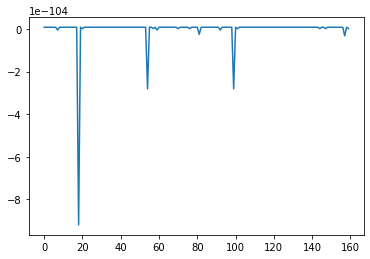

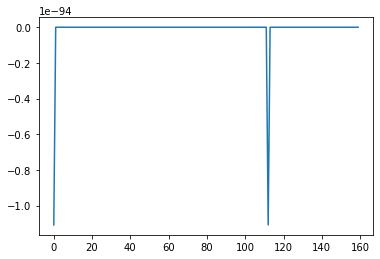

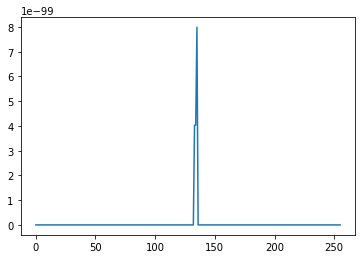

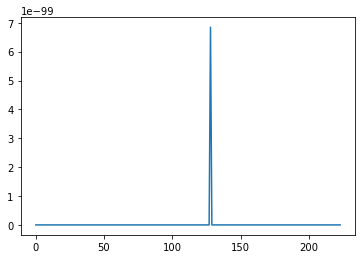

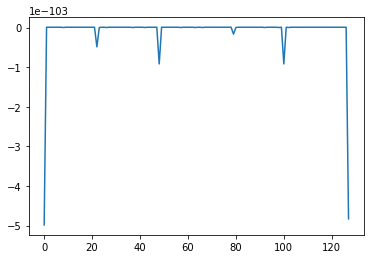

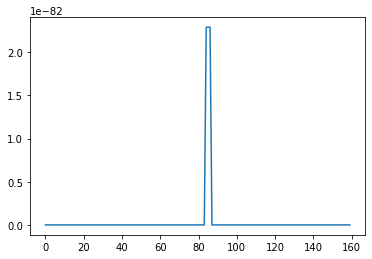

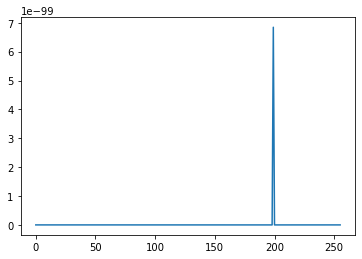

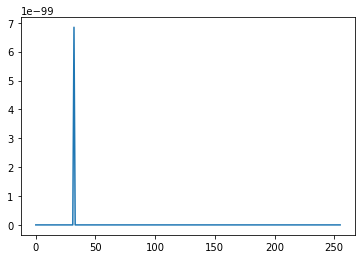

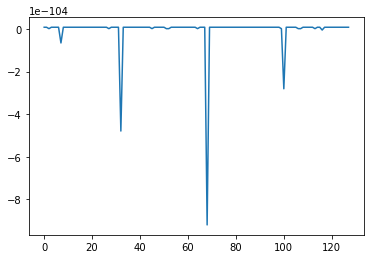

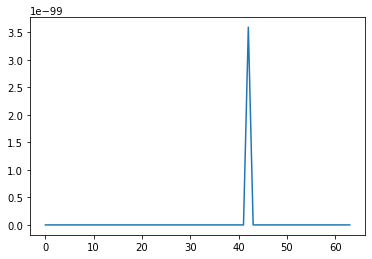

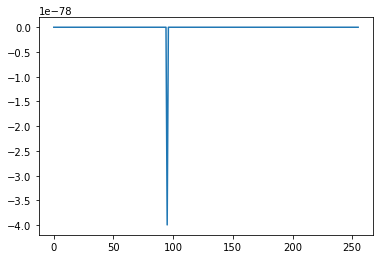

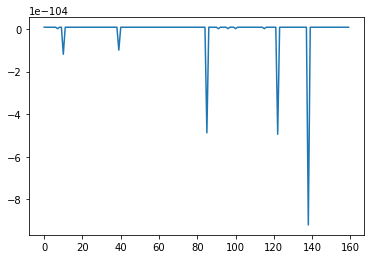

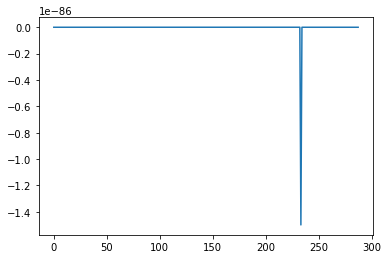

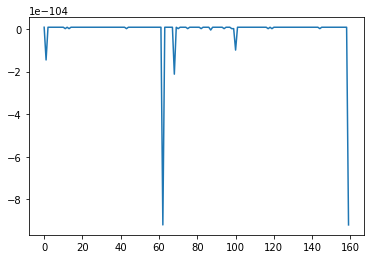

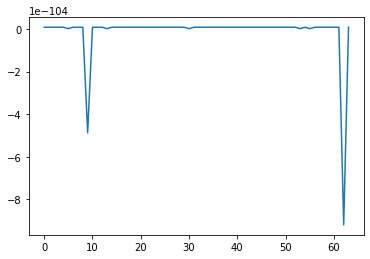

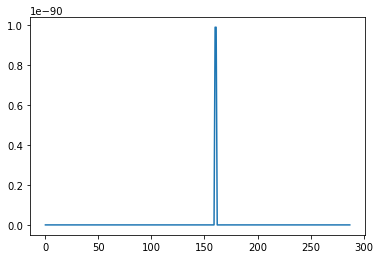

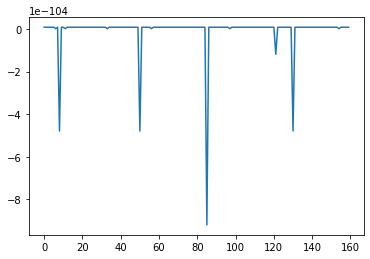

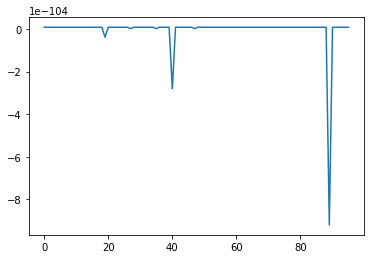

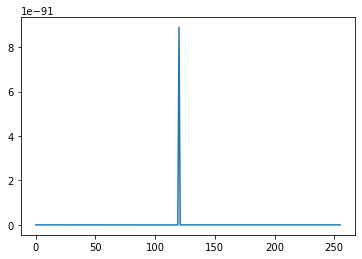

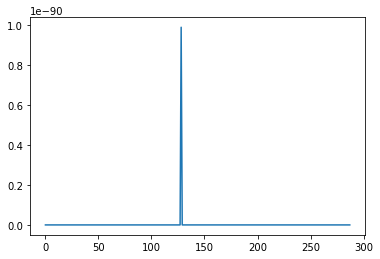

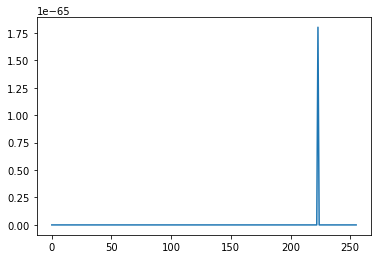

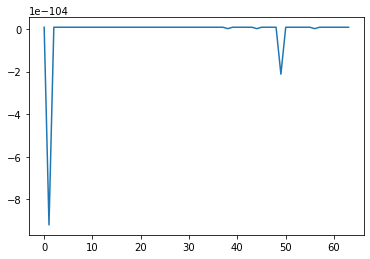

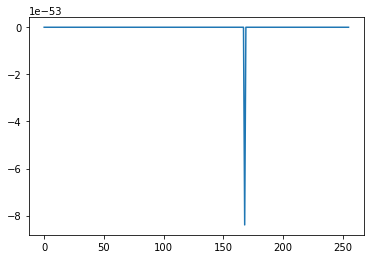

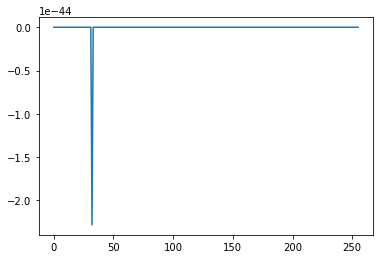

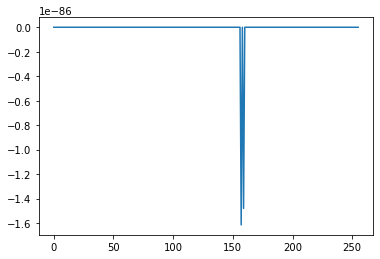

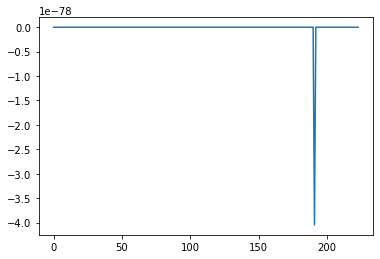

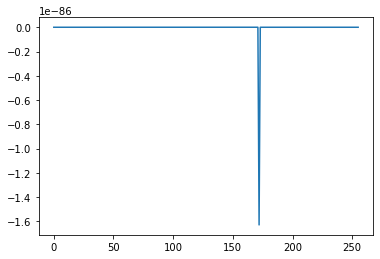

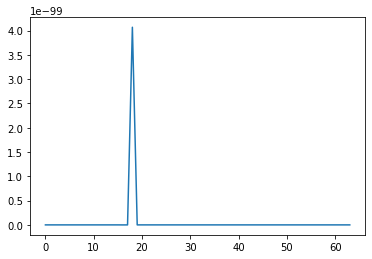

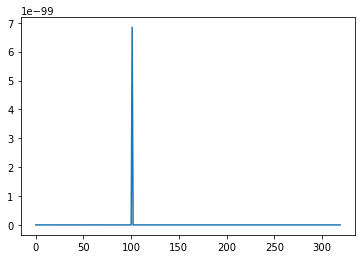

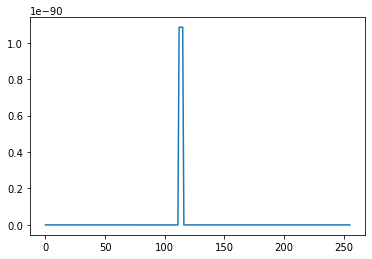

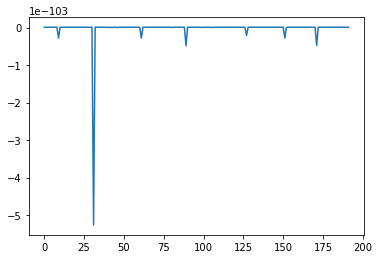

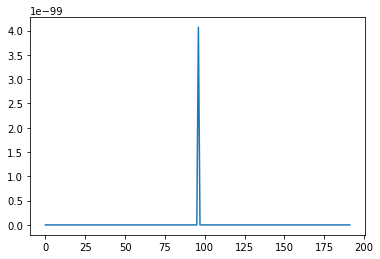

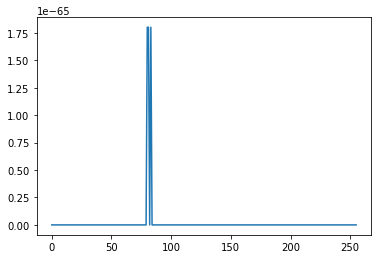

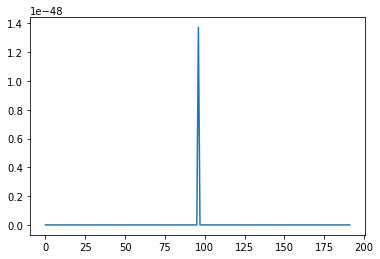

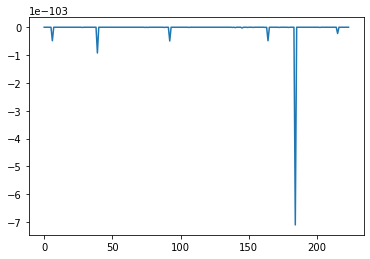

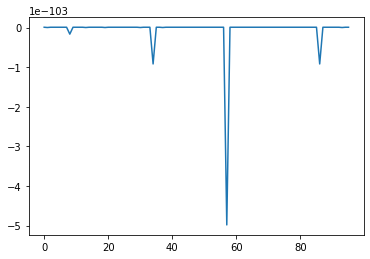

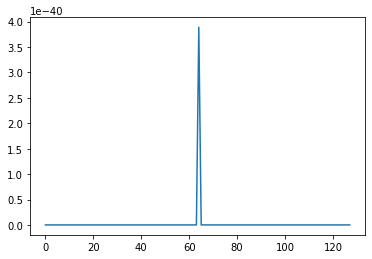

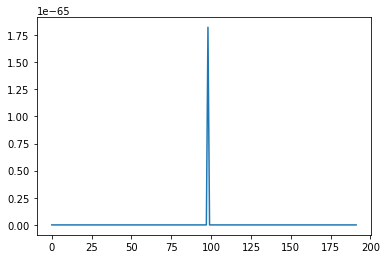

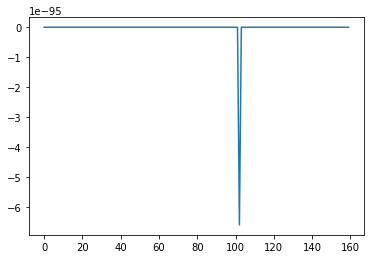

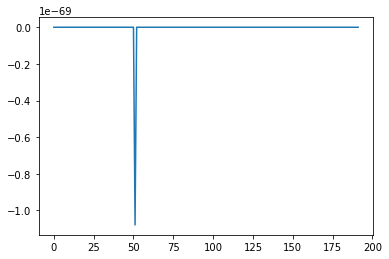

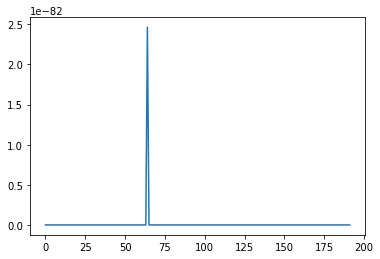

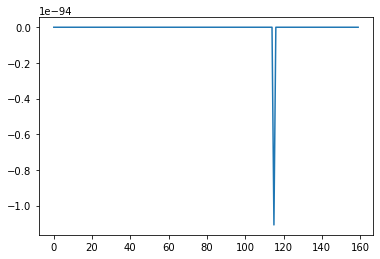

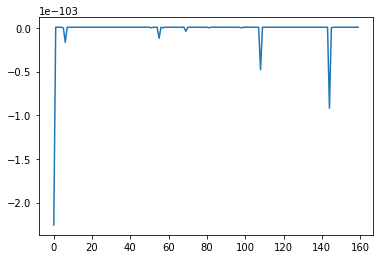

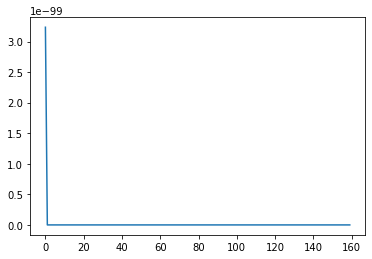

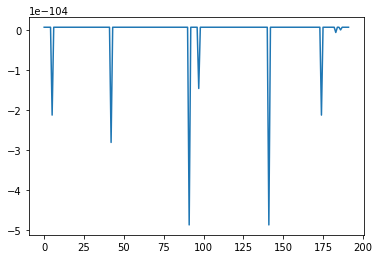

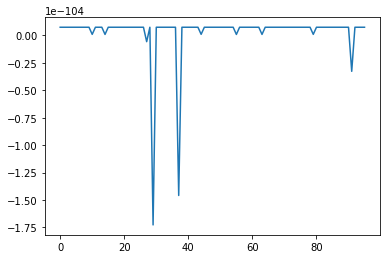

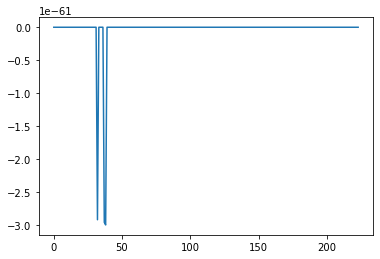

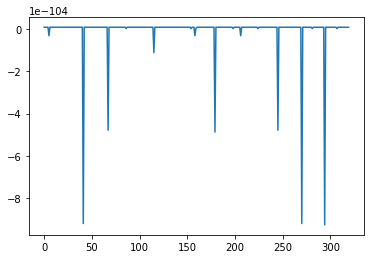

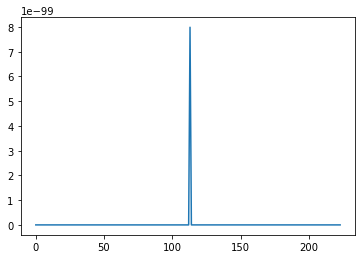

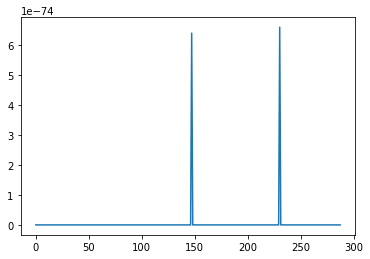

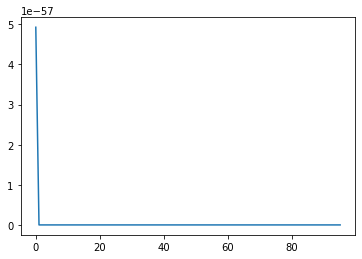

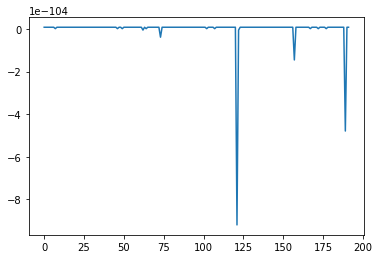

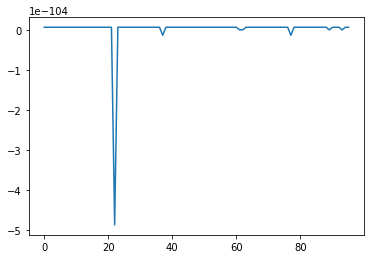

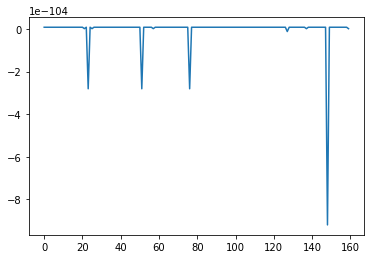

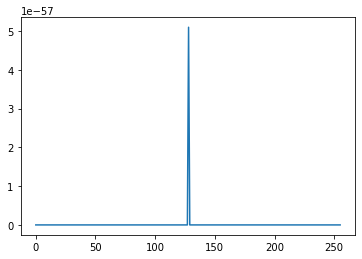

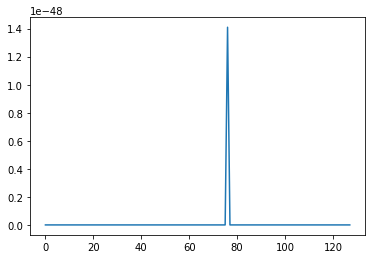

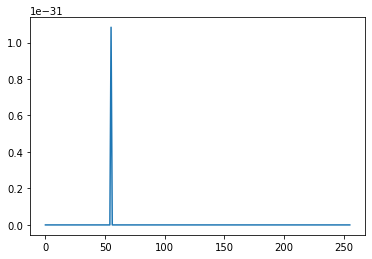

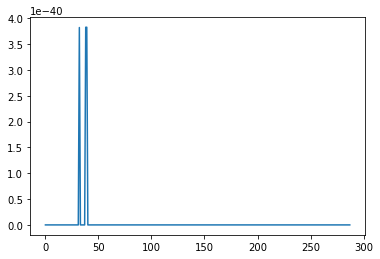

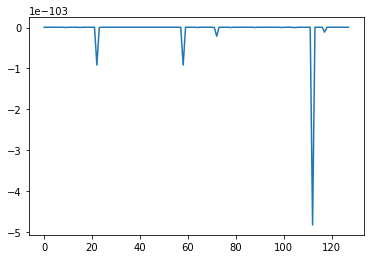

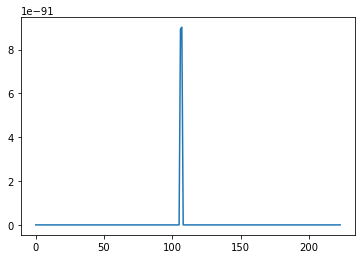

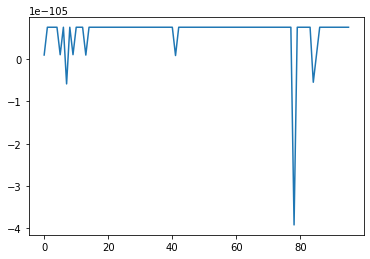

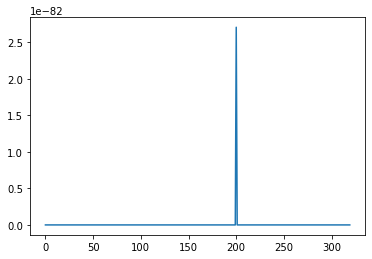

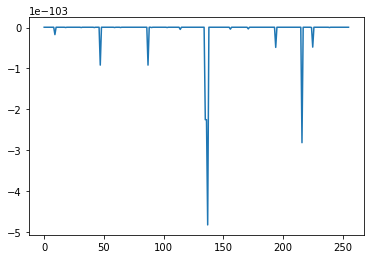

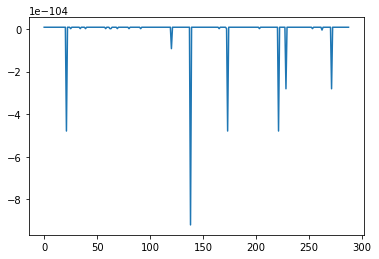

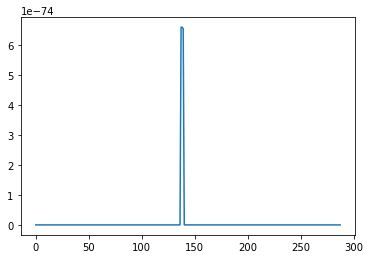

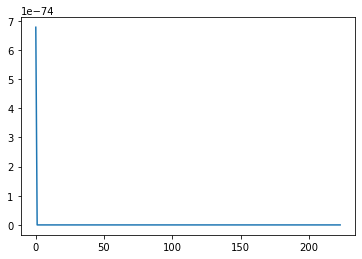

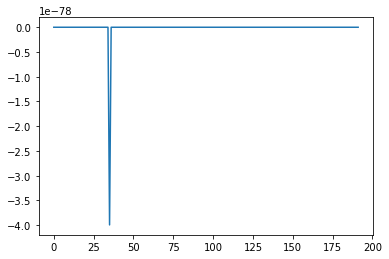

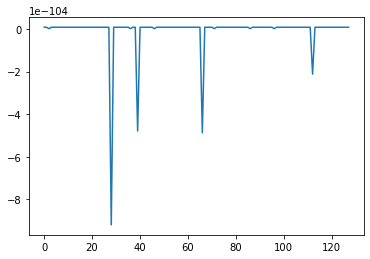

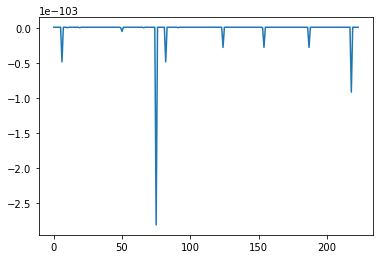

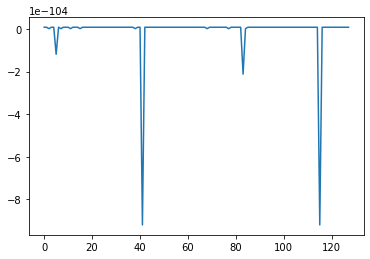

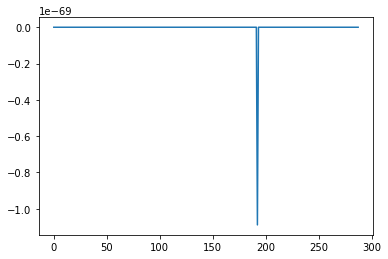

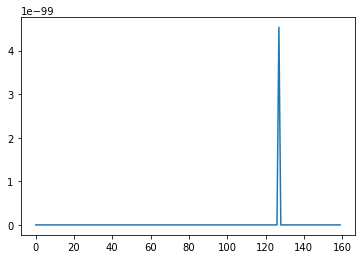

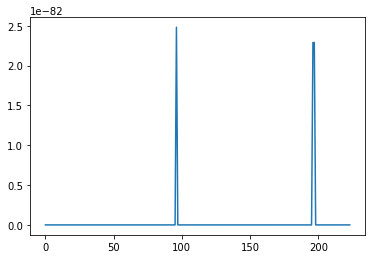

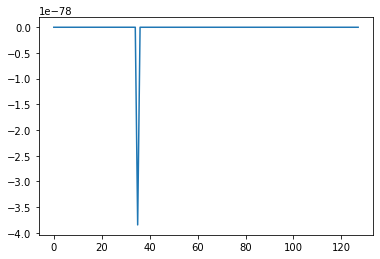

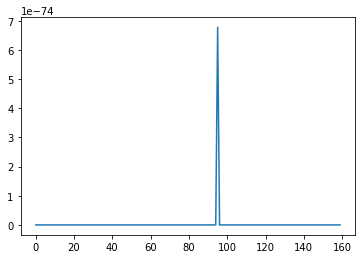

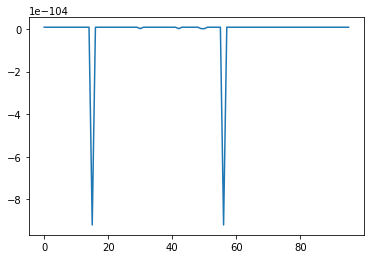

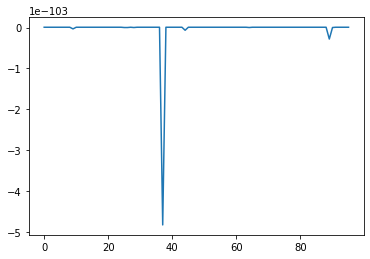

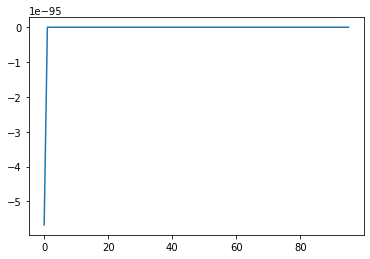

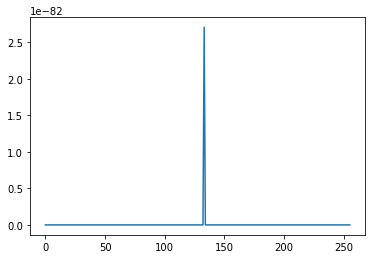

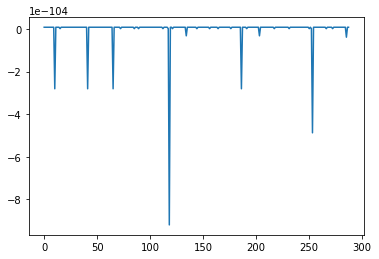

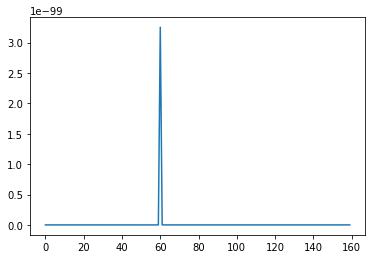

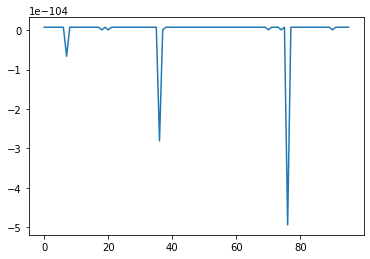

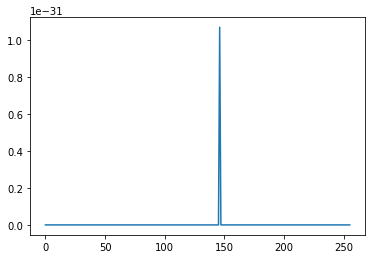

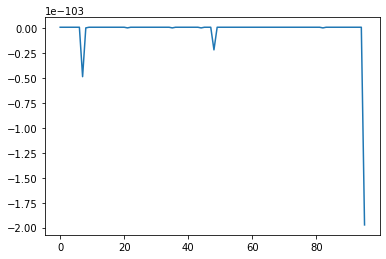

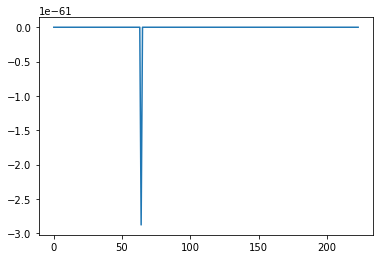

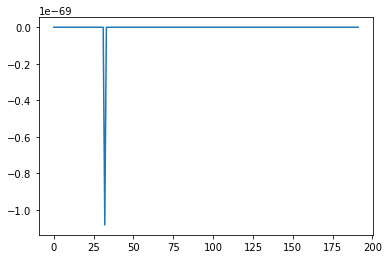

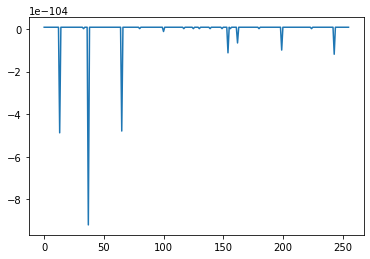

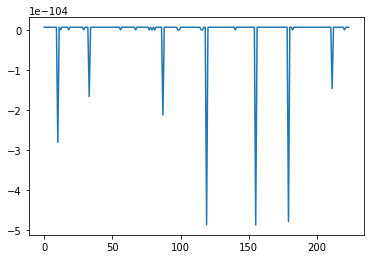

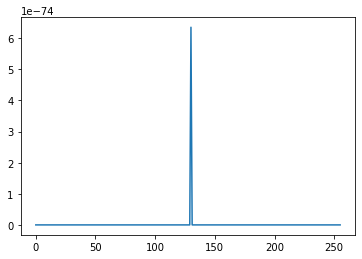

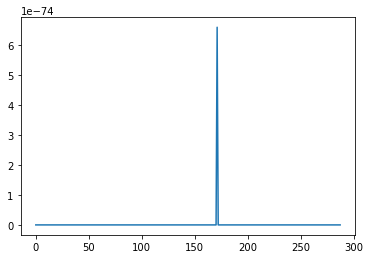

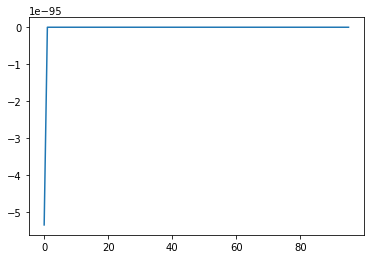

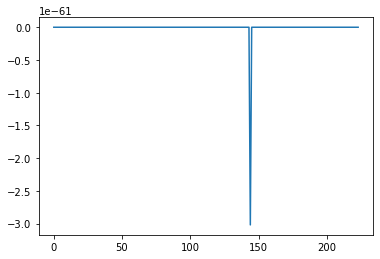

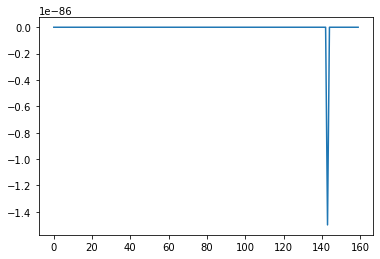

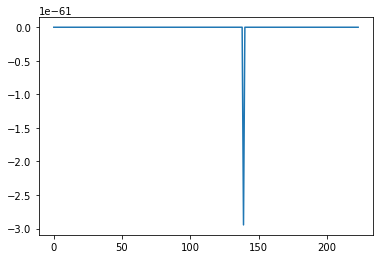

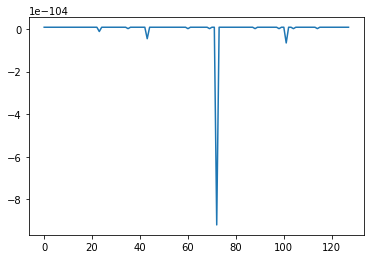

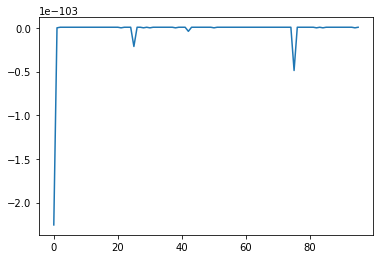

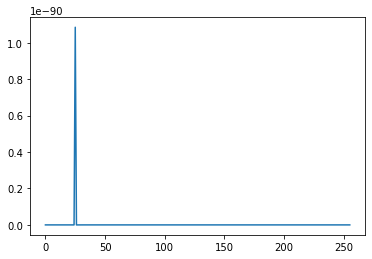

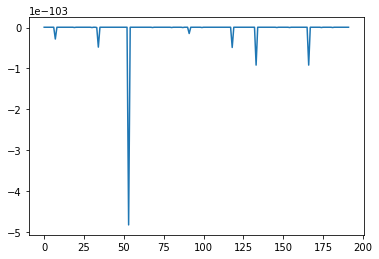

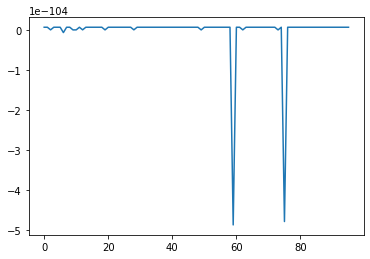

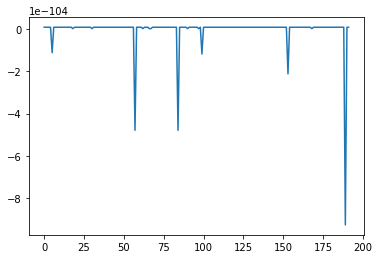

In [50]:
for i in unknown_pd:
    plt.plot(i)
    plt.show()

In [81]:
def mkde_test(train_file_num, test_file_num, data, n_mels):
    
    train_file_length = np.sum(train.file_split_num[:train_file_num])
    
    density = classes.mkde(train.X_split[:train_file_length],n_mels)
    density.make_pdf()
    print(density.dens)
    print(density.bw)
    
    
    all_time = time.time()
    start = time.time()  # 시작 시간 저장
    
    unknown_pd = []
    test_file_length = np.sum(data.file_split_num[:test_file_num])
    unknown_d = classes.mkde(data.X_split[:test_file_length],n_mels)
    file_pd = density.dens.pdf(unknown_d.reshaped_data)
#     print(file_pd)
    unknown_pd.append(file_pd)
    
    print(len(unknown_pd))
    print("time :", time.time() - start)
    print('all time : ', time.time() -all_time)
    return unknown_pd

[autoreload of classes failed: Traceback (most recent call last):
  File "C:\Users\GJ\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\GJ\anaconda3\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\GJ\anaconda3\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\GJ\anaconda3\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\GJ\PycharmProjects\2022SPCUP\classes.py", line 1
    %load_ext

(297, 32, 32) d
(9504, 32) d
KDE instance
Number of variables: k_vars = 32
Number of samples:   nobs = 9504
Variable types:      uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu
BW selection method: user-specified

[10.227185  10.139872   9.730466  10.309361  10.502987  10.022505
 10.547272  10.243204   9.910224  10.294425   9.91706    9.807046
  9.582528   9.562665   9.300672   9.208552   9.086919   8.641766
  8.496879   8.650827   8.795275   8.876209   8.347675   7.8865857
  7.972884   8.479998   8.665938   9.212178  10.347583  11.469835
 11.321101  11.489061 ]
(56, 32, 32) d
(1792, 32) d
1
time : 32.465925455093384
all time :  32.465925455093384


In [80]:
unknown_pd = mkde_test(50, 10, unknown, 32)
known_pd = mkde_test(50,10,test,32)
all_pd = np.concatenate((unknown_pd,known_pd),axis = None)
all_pd.shape
plt.plot(all_pd/np.max(all_pd))

(297, 32, 32) d
(9504, 32) d
KDE instance
Number of variables: k_vars = 32
Number of samples:   nobs = 9504
Variable types:      uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu
BW selection method: user-specified

[10.227185  10.139872   9.730466  10.309361  10.502987  10.022505
 10.547272  10.243204   9.910224  10.294425   9.91706    9.807046
  9.582528   9.562665   9.300672   9.208552   9.086919   8.641766
  8.496879   8.650827   8.795275   8.876209   8.347675   7.8865857
  7.972884   8.479998   8.665938   9.212178  10.347583  11.469835
 11.321101  11.489061 ]
(56, 32, 32) d
(1792, 32) d


KeyboardInterrupt: 

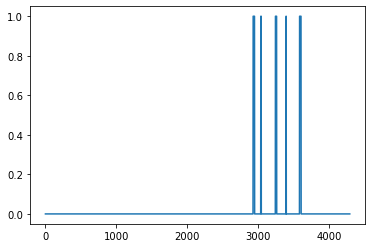

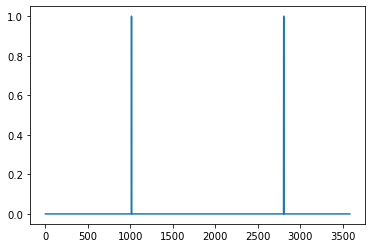

In [53]:
import time

print(train.X_split.shape)
density = classes.mkde(train.X_split[:300],32)
density.make_pdf()
print(density.dens)
print(density.bw)
un_file_split_num = unknown.file_split_num

import time

idx = 0
unknown_pd = []
all_time = time.time()
file_length = np.sum(un_file_split_num[:10])
print(file_length)
for i in range(file_length):
    start = time.time()  # 시작 시간 저장

    unknown_d = classes.mkde(unknown.X_split[:file_length],32)
    file_pd = density.dens.pdf(unknown_d.reshaped_data)
#     print(file_pd)
    idx += i
    unknown_pd.append(file_pd)
    print(len(unknown_pd))
    print("time :", time.time() - start)
    
print('all time : ', time.time() -all_time)


(25824, 32, 32)
(300, 32, 32) d
(9600, 32) d
KDE instance
Number of variables: k_vars = 32
Number of samples:   nobs = 9600
Variable types:      uuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu
BW selection method: user-specified

[10.212586  10.114421   9.705958  10.29368   10.49514   10.001071
 10.528454  10.2283945  9.892054  10.278527   9.900356   9.79123
  9.5684595  9.542819   9.278344   9.184904   9.068988   8.622266
  8.483661   8.637325   8.77952    8.85925    8.326526   7.868975
  7.9637794  8.46767    8.652692   9.19889   10.342637  11.482926
 11.326735  11.475646 ]
56
(56, 32, 32) d
(1792, 32) d
1
time : 32.96498680114746
(56, 32, 32) d
(1792, 32) d
2
time : 32.92992973327637
(56, 32, 32) d
(1792, 32) d
3
time : 33.13127875328064
(56, 32, 32) d
(1792, 32) d
4
time : 33.18917465209961
(56, 32, 32) d
(1792, 32) d
5
time : 33.236921072006226
(56, 32, 32) d
(1792, 32) d


KeyboardInterrupt: 

In [ ]:
print(len(unknown_pd))
prediction_un = []
for i in unknown_pd :
    if len(unknown_pd[unknown_pd<0.7])/len(unknown_pd)<0.5:
        prediction_un.append()

In [17]:

import time

print(train.X_split.shape)
density = classes.mkde(train.X_split[:600])
density.make_pdf()
std_feature = np.std(density.reshaped_data)
d = density.reshaped_data.shape[1]
feature_length = density.reshaped_data.shape[0]
c = (4/(d+2)/feature_length)**(1/(d+4))
bw = std_feature*c
pa = 1

var_type = 'u'*32

un_file_split_num = unknown.file_split_num
# print('kjl')
# print(len(un_file_split_num))
# print(un_file_split_num)
# print(unknown.y_split.size)
idx = 0
unknown_d = []
all_time = time.time()
for i in un_file_split_num:
    start = time.time()  # 시작 시간 저장
    
    print('input_shape : ',unknown.X_split[idx:idx+i].shape)
    shaped_in = unknown.X_split[idx:idx+i].transpose((0,2,1))
    shaped_in = shaped_in.reshape(-1,shaped_in.shape[2])
    print('input_shape : ',shaped_in.shape)
    print(dens_p)
    seg_pd = dens_p.pdf(shaped_in)
    idx += i
    print("time :", time.time() - start)
    
print('all time : ', time.time() -start)
# for i in 
# unknown_d.classes.mkde(unknown.X_split)


(25824, 32, 32)
(600, 32, 32) d
(19200, 32) d
input_shape :  (5, 32, 32)
input_shape :  (160, 32)


NameError: name 'dens_p' is not defined

In [16]:
std_a = np.std(density.reshaped_data,axis = 0)
print(std_a.shape)

(32,)


In [ ]:
un_file_split_num = unknown.file_split_num
# print('kjl')
# print(len(un_file_split_num))
# print(un_file_split_num)
# print(unknown.y_split.size)
idx = 0
unknown_d = []
all_time = time.time()
for i in un_file_split_num:
    start = time.time()  # 시작 시간 저장
    
    print('input_shape : ',unknown.X_split[idx:idx+i].shape)
    shaped_in = unknown.X_split[idx:idx+i].transpose((0,2,1))
    shaped_in = shaped_in.reshape(-1,shaped_in.shape[2])
    print('input_shape : ',shaped_in.shape)
    print(dens_p)
    seg_pd = dens_p.pdf(shaped_in)
    idx += i
    print("time :", time.time() - start)
    
print('all time : ', time.time() -start)
# for i in 
# unknown_d.classes.mkde(unknown.X_split)


In [ ]:
predecttion = density.dens.pdf(unknown_d.reshaped_data)

In [ ]:
plt.plot(predecttion)

In [ ]:
test_d = classes.mkde(test.X_split)
prediction_test = density.dens.pdf(unknown_d.reshaped_data)

In [ ]:
plt.plot(prediction_test)

In [ ]:
for i in range(len(prediction_test)):
    print(prediction_test[i])

In [ ]:
for i in range(len(prediction_test)):
    print(predecttion[i])

In [ ]:
TN = prediction_test[prediction_test>th]
acc_test = len(TN)/1000

In [ ]:
data = train.X_split[:].transpose((0,2,1))
print(data.shape)
data_mkde = data.reshape((-1,data.shape[2]))
print(data_mkde.shape)


In [ ]:

print(var_type)

In [ ]:
import statsmodels.api as sm
# nobs = 300
var_type = 'u'*64
print(var_type)

dens_u = sm.nonparametric.KDEMultivariate(data=data_mkde, var_type=var_type, bw='normal_reference')
dens_u.bw


In [ ]:
data = test.X_split[:].transpose((0,2,1))
print(data.shape)
data_mkde = data.reshape((-1,data.shape[2]))
print(data_mkde.shape)

In [ ]:

##test set
print('raw test_set_num :',len(y_test_raw))
y_labels_aug = []
X_mel_aug = []
file_split_num_test = []
for i, filepath in enumerate(X_test_path):
    # fig, ax = plt.subplots()
    y, sr = librosa.load(filepath, mono=True, sr = sampling_rate)
    index_f = 0
    for j in range(y.size//sampling_rate):
        X_aug_seg = y[index_f:index_f+sampling_rate]


        S = librosa.feature.melspectrogram(y=X_aug_seg, sr=sampling_rate, n_mels=n_mels,
                                           fmax=8000, hop_length = hop_length, n_fft = n_fft)
        S_dB = librosa.power_to_db(S, ref=np.max)
        X_mel_aug.append(S_dB)

        y_labels_aug.append(y_test_raw[i])

        index_f = index_f+sampling_rate
    file_split_num_test.append(j+1)

X_test1 = np.array(X_mel_aug)
y_test1 = np.array(y_labels_aug)
print('splited_test set.shape : ',X_test1.shape)
print('y_test.shape : ', y_test1.shape)
print(len(file_split_num_test))



In [ ]:
data_test = X_test1[:].transpose((0,2,1))
print(data_test.shape)
data_mkde_test = data_test.reshape((-1,data_test.shape[2]))
print(data_mkde_test.shape)